In [1]:
import os
os.chdir("/home/studio-lab-user/sagemaker-studiolab-notebooks/AI-OT24/Reinforcement-Learning-Stock-Porfolio-Managment")
!pip install -q -r requirements.txt
import sys
sys.path.append('./utils')
from trading_functions import *
# Core Libraries
import os
import sys
import time
import datetime
import warnings
#warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = info, 2 = warnings, 3 = errors

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Financial Data
import yfinance as yf
import quantstats as qs
import ta

# Machine Learning - Supervised Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Machine Learning - Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.losses import BinaryCrossentropy

# Reinforcement Learning and Environments
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import (
    EvalCallback, StopTrainingOnRewardThreshold, StopTrainingOnNoModelImprovement
)
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecCheckNan, VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from sb3_contrib import ARS, MaskablePPO, RecurrentPPO, QRDQN, TRPO

# Imitation Learning
from imitation.algorithms import bc
from imitation.testing.reward_improvement import is_significant_reward_improvement
from imitation.data.types import Transitions

# Interactive Brokers API
from ib_insync import *

from typing import Callable

from collections import Counter

clear_output()


1068 None
534 2019-04-03 00:00:00
267 2021-05-17 00:00:00
133 2022-06-07 00:00:00
Evaluating model: A2C


/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


A2C Train Mean reward: 64.03 ± 0.00
A2C
Total return of portfolio: 969.43%


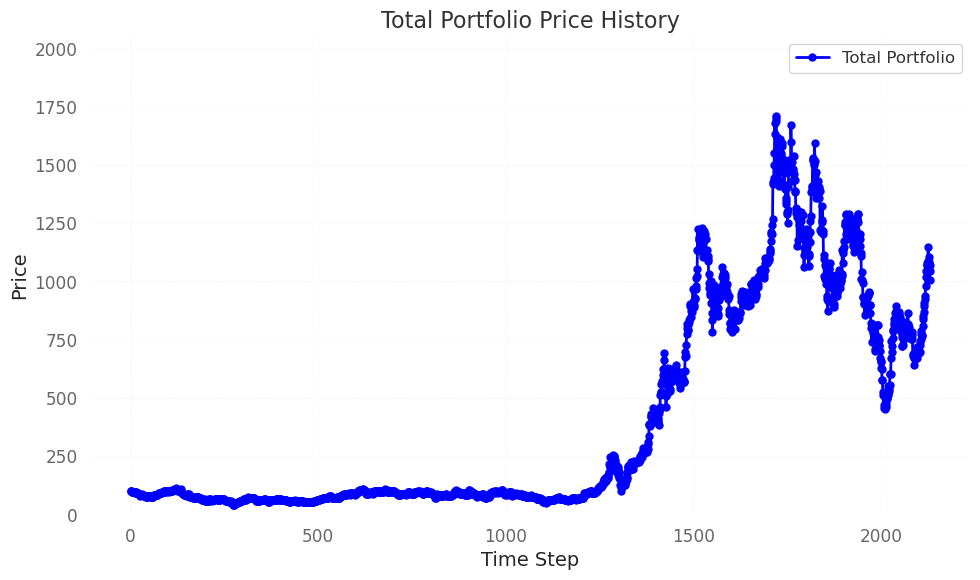

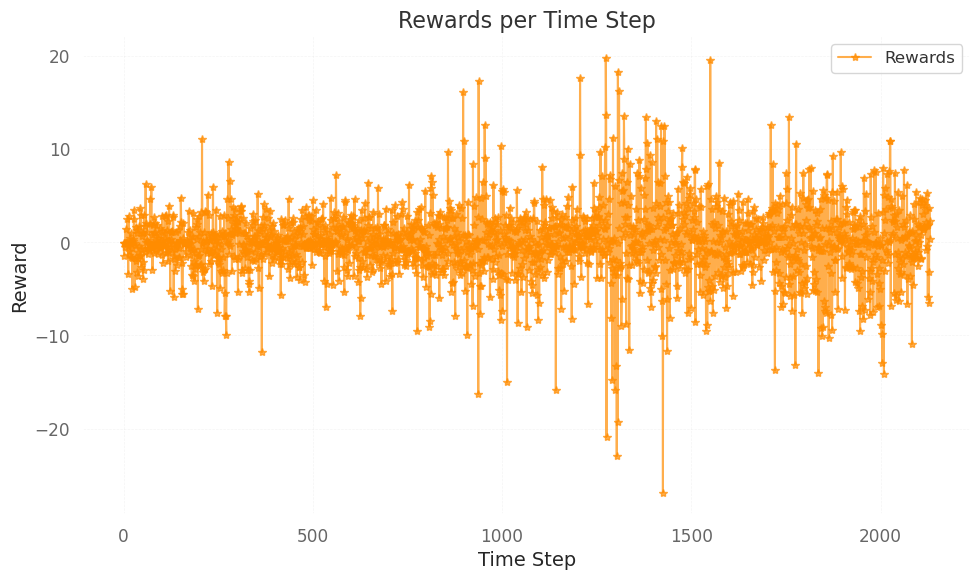

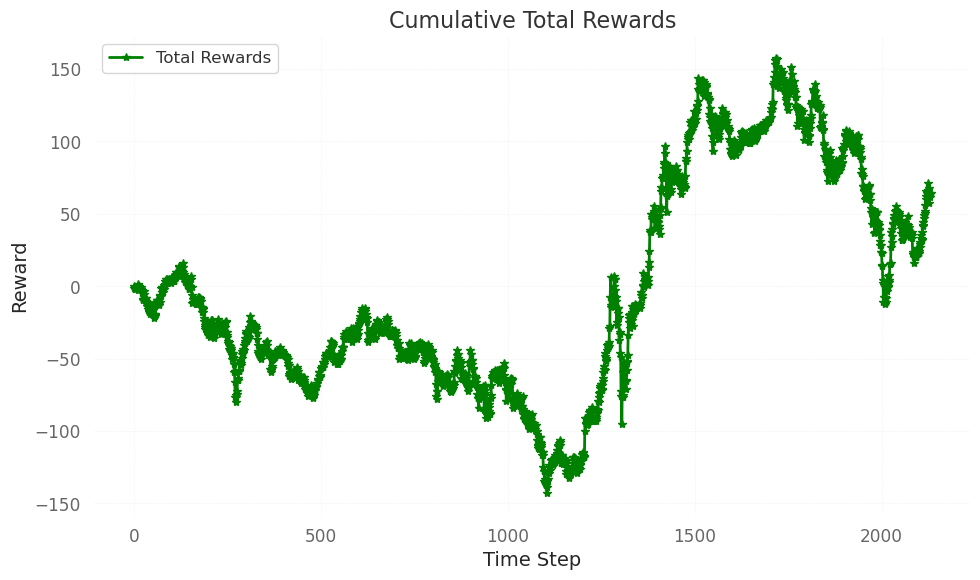

Total rewards: 64.02519247017051
A2C Valid Mean reward: -17.10 ± 0.00
A2C
Total return of portfolio: -16.14%


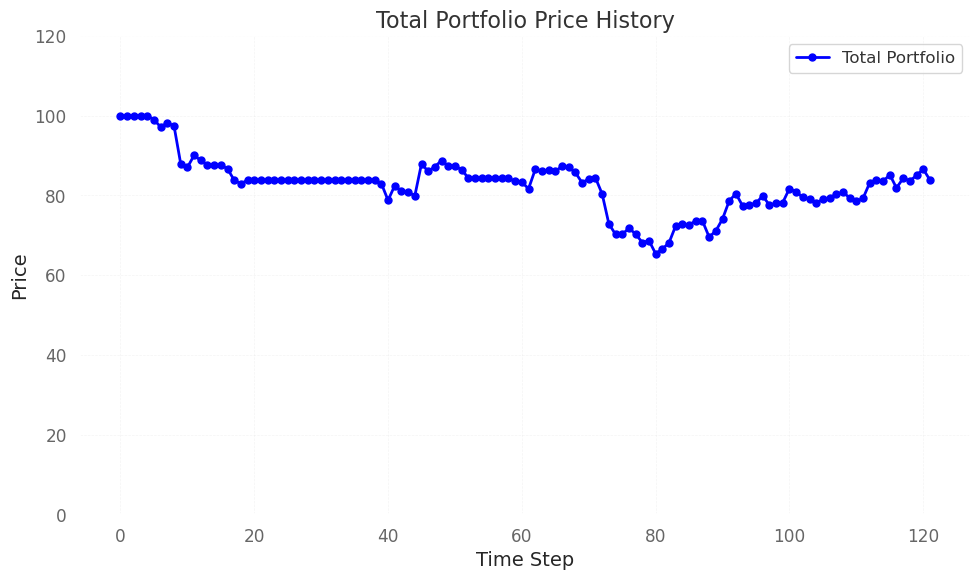

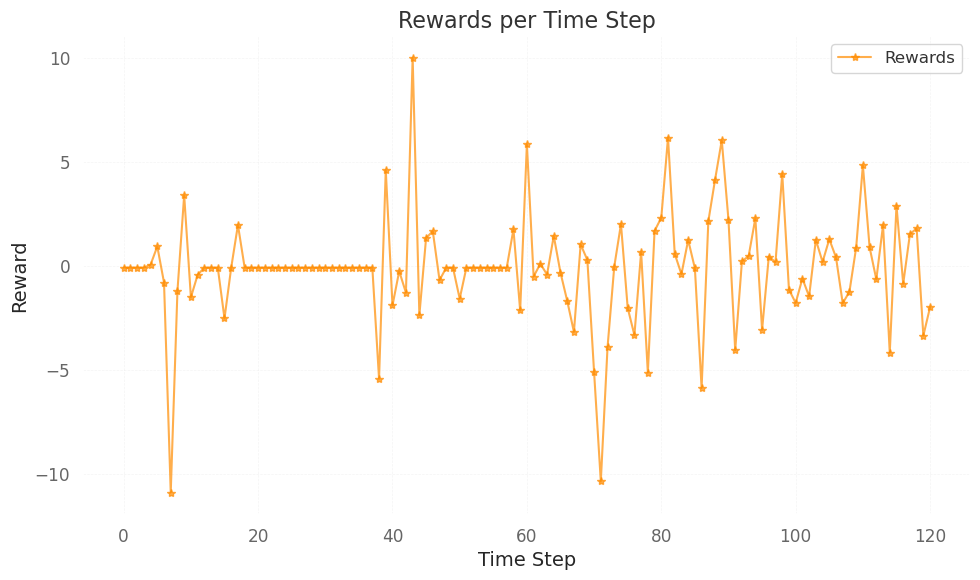

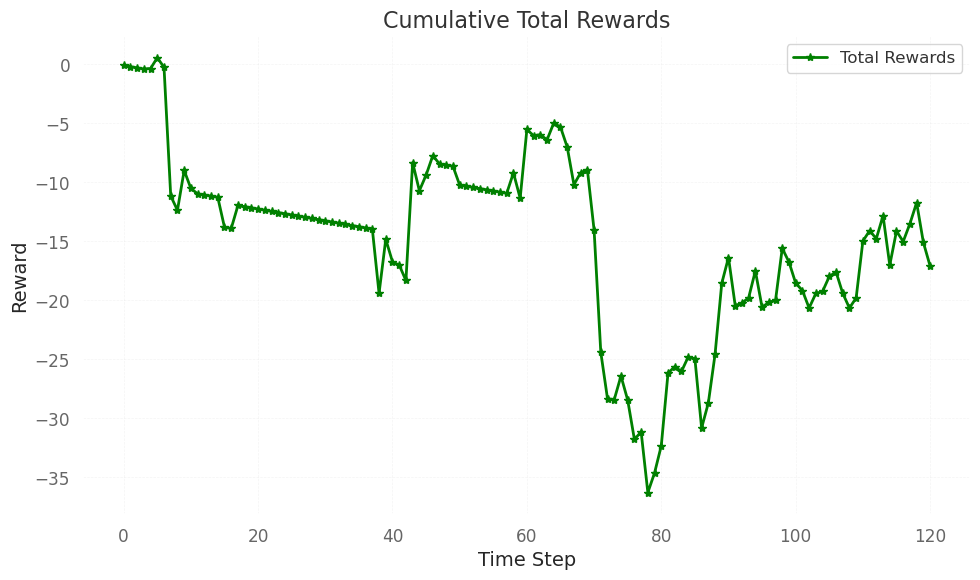

Total rewards: -17.095761137292286
A2C Test Mean reward: 32.38 ± 0.00

A2C
Total return of portfolio: 47.14%


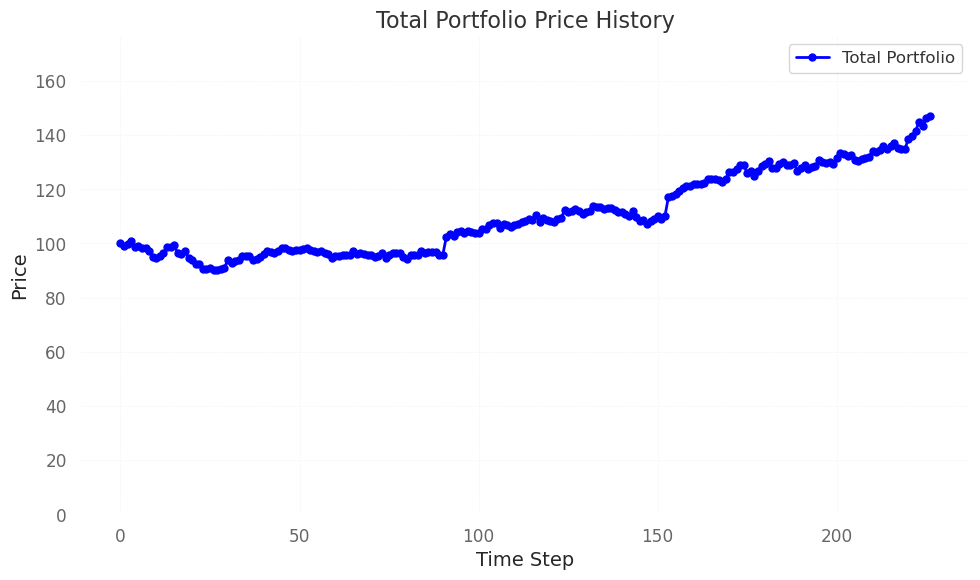

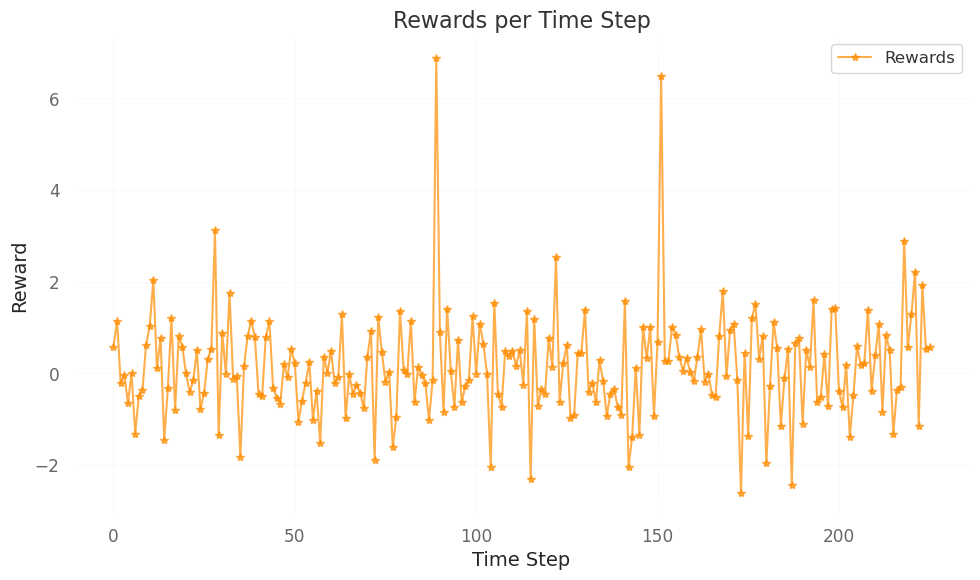

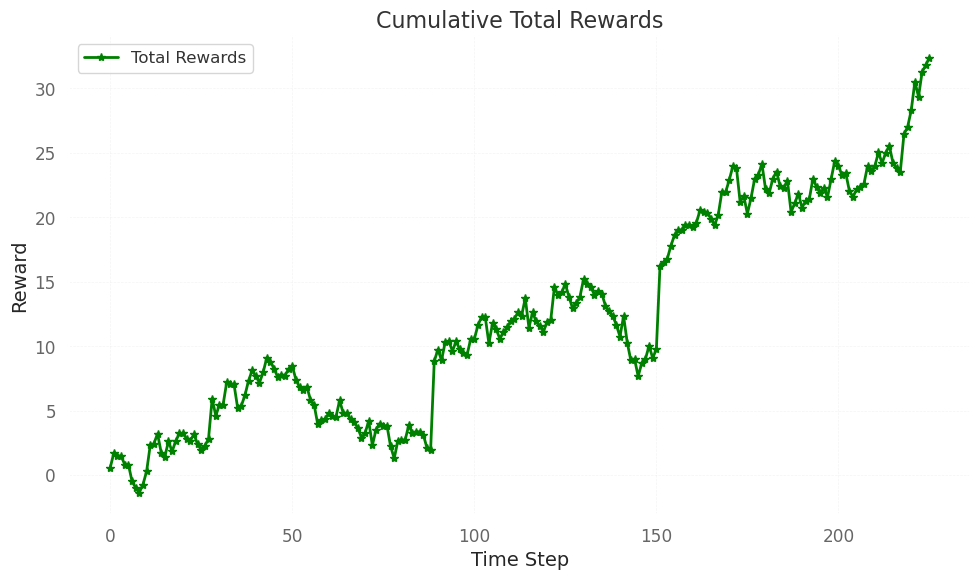

Total rewards: 32.380115097098965


In [5]:
# Define constants
SEED = 1
history_length = 5
reward_type = 'LNR'
stocks = ['AAPL', 'AMZN', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2015-01-01'
end_date = '2023-06-30'
n_envs = 8
n_steps = 16
total_timesteps = 50_000
batch_size = 32
learning_rate = 0.001
ent_coef = 0.05
log_interval = 1_000
eval_freq = 1_000
model_name= 'A2C'

current_date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_dir = None #f'./models/model_{current_date}'
log_dir = None #f'./logs/log_{current_date}'


# Training environment
env, vec_env = create_training_env(history_length, reward_type, '2015-01-01', '2023-06-30', stocks, n_envs)

# Validation environment
valid_env, vec_valid_env = create_evaluation_env(history_length, reward_type, '2023-07-01', '2023-12-30', stocks)

# Test environment
test_env, _ = create_evaluation_env(history_length, reward_type, '2024-01-01', '2024-12-01', ['CVNA', 'MSTR', 'GOOGL', 'WMT', 'V', 'PG'], n_envs=1)

# Evaluation callback for saving the best model
eval_callback = EvalCallback(
    vec_valid_env,
    n_eval_episodes=1,
    eval_freq=eval_freq,
    deterministic=True,
    verbose=0,
    best_model_save_path=model_save_dir,
)
stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)

policy_kwargs = None #dict(net_arch=dict(pi=[32, 32], vf=[32, 32]))
model = None
model = PPO('MlpPolicy', 
            vec_env, 
            learning_rate=0.002, 
            n_steps=8, 
            batch_size=16, 
            n_epochs=10, 
            gamma=0.99, 
            gae_lambda=0.95, 
            clip_range=0.2, 
            clip_range_vf=None, 
            normalize_advantage=True, 
            ent_coef=0.10, vf_coef=0.5, 
            max_grad_norm=0.5, 
            use_sde=False, 
            sde_sample_freq=-1, 
            rollout_buffer_class=None, 
            rollout_buffer_kwargs=None, 
            target_kl=None, 
            stats_window_size=100, 
            tensorboard_log = log_dir, 
            policy_kwargs=policy_kwargs, 
            verbose=0, 
            seed=0, 
            device='auto', 
            _init_setup_model=True)

trained_model = A2C('MlpPolicy', 
                    vec_env,
                    learning_rate=0.02,
                    n_steps=16,
                    gamma=0.99,
                    gae_lambda=1.0,
                    ent_coef=0.05,
                    vf_coef=0.5,
                    max_grad_norm=0.5,
                    rms_prop_eps=1e-05,
                    use_rms_prop=True,
                    use_sde=False,
                    sde_sample_freq=-1,
                    rollout_buffer_class=None,
                    rollout_buffer_kwargs=None,
                    normalize_advantage=False,
                    stats_window_size=100,
                    tensorboard_log=log_dir,
                    policy_kwargs=None,
                    verbose=0,
                    seed=0,
                    device='auto',
                    _init_setup_model=True)

trained_model.learn(
            total_timesteps=total_timesteps,
            progress_bar=False,
            log_interval=log_interval,
            tb_log_name=f"A2C",
            reset_num_timesteps=True,
            callback=eval_callback
        )

date = None
date_length = env.df_unscaled.shape[0]
for i in range(4):
    date_length = date_length//2
    print(date_length,date)
    date = env.df_unscaled.index[-date_length]
    _, vec_env = create_training_env(history_length, reward_type, date, end_date, stocks, n_envs)
    trained_model.set_env(vec_env)
    param = trained_model.get_parameters()
    param['policy.optimizer']['param_groups'][0]['lr'] = param['policy.optimizer']['param_groups'][0]['lr']/2
    trained_model.set_parameters(param)
    trained_model.learn(
            total_timesteps=total_timesteps,
            progress_bar=False,
            log_interval=log_interval,
            tb_log_name=f"A2C",
            reset_num_timesteps=False,
            callback=eval_callback
        )
    vec_env.close()
        
# Evaluate the model on training and test environments
print(f"Evaluating model: {model_name}")

# Training evaluation
mean_train_reward, std_train_reward = evaluate_policy(
    trained_model.policy if hasattr(trained_model, 'policy') else trained_model,
    env,
    n_eval_episodes=1,
    deterministic=True
)
print(f"{model_name} Train Mean reward: {mean_train_reward:.2f} ± {std_train_reward:.2f}")
evaluate_model(env, trained_model, model_name, 1, has_policy=True) if hasattr(trained_model, 'policy') else evaluate_model(env, trained_model, model_name, 1, has_policy=False)

# Valid evaluation
mean_valid_reward, std_valid_reward = evaluate_policy(
    trained_model.policy if hasattr(trained_model, 'policy') else trained_model,
    valid_env,
    n_eval_episodes=1,
    deterministic=True
)
print(f"{model_name} Valid Mean reward: {mean_valid_reward:.2f} ± {std_valid_reward:.2f}")
evaluate_model(valid_env, trained_model, model_name, 1, has_policy=True) if hasattr(trained_model, 'policy') else evaluate_model(valid_env, trained_model, model_name, 1, has_policy=False)

# Test evaluation
mean_test_reward, std_test_reward = evaluate_policy(
    trained_model.policy if hasattr(trained_model, 'policy') else trained_model,
    test_env,
    n_eval_episodes=1,
    deterministic=True
)
print(f"{model_name} Test Mean reward: {mean_test_reward:.2f} ± {std_test_reward:.2f}\n")
evaluate_model(test_env, trained_model, model_name, 1, has_policy=True) if hasattr(trained_model, 'policy') else evaluate_model(test_env, trained_model, model_name, 1, has_policy=False)

# Close environments
env.close()
valid_env.close()
test_env.close()
vec_valid_env.close()
vec_env.close()
del trained_model
del model